<b>Takwimu Lab est un groupe de travail de jeunes intéressés par la science des données (Data Science) et tout type d'apprentissage automatique (Machine Learning). Nous ne sommes ni professionnels de la santé, ni épidémiologistes. Par conséquent, les opinions ou conclusions dans cet exercice ne doivent en aucun cas être considérées comme des avis ou conseils de professionnels. Cependant, nous restons ouverts à toute collaboration avec des profils-métiers afin d'afiner nos résultats pour un usage d'intérêt général</b>.

In [1]:
import pandas as pd
import datetime as dt
import locale
locale.setlocale(locale.LC_TIME,'fr_FR.UTF-8')
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

In [3]:
cases = pd.read_csv(dir+'time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv(dir+'time_series_covid19_deaths_global.csv')
recovered = pd.read_csv(dir+'time_series_covid19_recovered_global.csv')

In [4]:
bbtnn_cases = cases.loc[cases['Country/Region'] == 'Benin'].copy().fillna('')
bbtnn_deaths = deaths.loc[deaths['Country/Region'] == 'Benin'].copy().fillna('')
bbtnn_recovered = recovered.loc[recovered['Country/Region'] == 'Benin'].copy().fillna('')

In [5]:
def trans_ts(df):
    df_trans = df.drop(columns=['Province/State','Lat','Long']).rename(columns={'Country/Region':' '}).set_index(' ').transpose()
    df_trans.index = pd.to_datetime(df_trans.index)
    return(df_trans)

In [6]:
ts_cases = trans_ts(bbtnn_cases)
ts_death = trans_ts(bbtnn_deaths)
ts_recovered = trans_ts(bbtnn_recovered)

In [7]:
benin_ts = pd.DataFrame(index=ts_cases.loc[ts_cases['Benin'] > 0][['Benin']].index)
benin_ts['Cas_Total'] = ts_cases.loc[benin_ts.index, 'Benin']
benin_ts['Guerison'] = ts_recovered.loc[benin_ts.index, 'Benin']
benin_ts['Morts'] = ts_death.loc[benin_ts.index, 'Benin']

Text(0.5, 1.0, "Evolution du Covid-19 au Bénin à partir du 1er jour d'apparition")

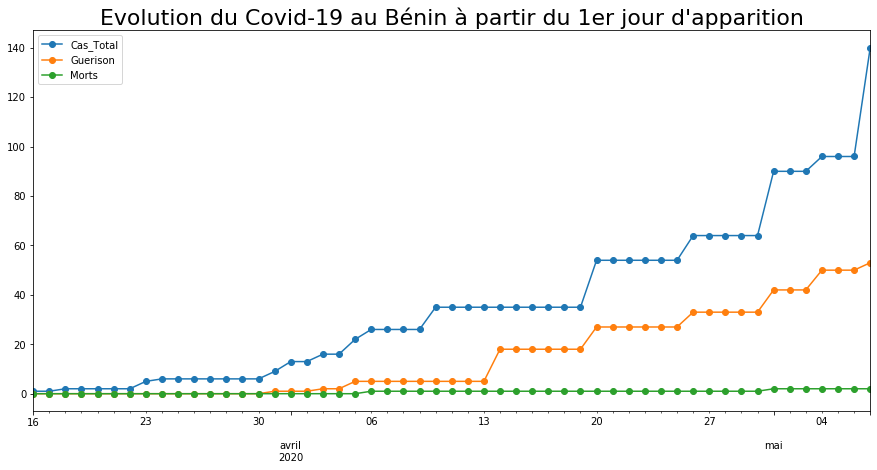

In [8]:
benin_ts[['{}'.format(i) for i in benin_ts.columns]].plot(marker='o',figsize=(15,7)).set_title("Evolution du Covid-19 au Bénin à partir du 1er jour d'apparition",fontdict={'fontsize': 22})

L'objectif dans cette application est de tester plusieurs simulations possible de l'évolution du covid-19 au Bénin en fonction des données dont nous disposons. Ce qui revient fréquemment dans l'opinion publique, c'est que le nombre cumulé de cas de covid-19 a une croissance exponentielle dans le monde. Vu qu'il faut bien partir de quelque chose, nous allons prendre cette hypothèse comme point de départ pour effectuer notre première simulation.

# Mais quand parle t-on de croissance exponentielle ?
Généralement, on parle de croissance quand la quantité de quelque chose augmente d'un instant -t- à un autre. 
<img src="images/croissance.png">
Sur l'image ci-dessus, on a trois types de croissance. Contrairement à la croissance A qui nous sert juste de référence, on constate qu'au niveau de la croissance B, la valeur augmente de 200 toutes les heures. Dans de pareil cas, la courbe d'évolution de la variable observée est semblable à une ligne droite, on dit que la croissance est linéaire. Au niveau de la croissance C, on constate que chaque heure, la valeur augmente, mais pas du même nombre, tout comme pour la croissance A. Mais quand on observe de plus près, on se rend compte que l'évolution se fait telle que la valeur au temps t+1 est égale à la valeur au temps t multipliée par 1,25. C'est comme quand vous placez votre argent dans une banque à un taux d'intérêt fixe. Si vous ne retirez pas vos gains après la première année, votre nouveau capital devient le capital de départ plus l'intéret, et c'est à ce nouveau montant que le taux d'intérêt sera appliqué pour la nouvelle année. Dans ce cas, on dit que la croissance est exponentielle. <b>ATTENTION !</b> Croissance exponentielle ne rime pas toujours avec croisance forte ni rapide comme son usage ces derniers temps aurait pu nous le faire croire. Il est possible qu'une croissance même linéaire simple (B) soit plus forte et rapide qu'une croissance exponentielle, comme on peut l'observer entre 6h et 17h. Il faut donc éviter de tomber dans le piège de la généralisation.
<br>
Nous supposerons dans un premier temps que le nombre cumulé de cas de covid-19 au Bénin suit une fonction exponentielle simple comme la fonction de départ dans la figure ci-dessous. Notre objectif à ce niveau est de trouver les paramètres A et B de la dite fonction, <b>x</b> étant le combre de jour de présence du covid-19 au Bénin.
<img src="images/transformation0.jpg">
Déterminer <b>A</b> et <b>B</b> de la fonction <b>f(x)</b> revient à déterminer les valeurs des paramètres <b>a</b> et <b>b</b> de l'équation de droite <b>y = a*x + b</b> puis à calculer leurs exponentielles. Pour ce faire, on fera recours à l'<b>algorithme de machine learning de la régression linéaire simple</b>, après avoir calculé le logarithme de chaque nombre cumulé de cas de covid-19 depuis le jour 1 de son apparition au Bénin.

In [9]:
benin = benin_ts.reset_index(drop=True)
benin.index = benin.index+1

Le code ci-dessus permet de supprimer les index temporelles (dates) de notre table de données et de passer une décompte. Par défaut, python commence son indexation à partir de 0 contrairement à R qui commence par 1 directement. Afin de passer de 0 à 1, nous avons ajouter 1 à tous les index.

In [10]:
benin['Log_cas'] = np.log(benin.Cas_Total) # Calcul du logarithme des nombres cumulés de cas.

In [11]:
benin

,Cas_Total,Guerison,Morts,Log_cas
1,1,0,0,0.000000
2,1,0,0,0.000000
3,2,0,0,0.693147
4,2,0,0,0.693147
5,2,0,0,0.693147
6,2,0,0,0.693147
7,2,0,0,0.693147
8,5,0,0,1.609438
9,6,0,0,1.791759
10,6,0,0,1.791759


Text(0.5, 1.0, "Evolution du nombre de cas de Covid-19 au Bénin à partir du 1er jour d'apparition")

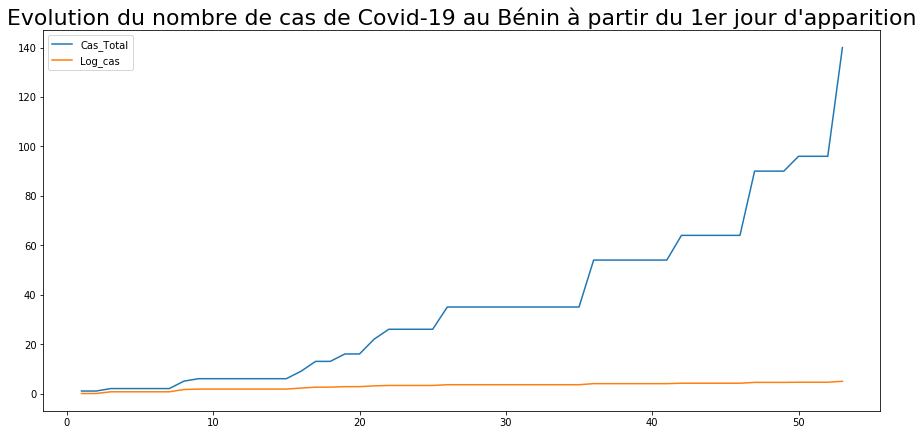

In [12]:
benin[['{}'.format(i) for i in ['Cas_Total', 'Log_cas']]].plot(marker='',figsize=(15,7)).set_title("Evolution du nombre de cas de Covid-19 au Bénin à partir du 1er jour d'apparition",fontdict={'fontsize': 22})

In [13]:
import statsmodels.api as sm

X = benin.dropna().index
X = sm.add_constant(X)
Y = benin.dropna().Log_cas
mod_lin = sm.OLS(Y, X)
res_lin = mod_lin.fit()
print(res_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                Log_cas   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     550.8
Date:               ven., 08 mai 2020   Prob (F-statistic):           5.40e-29
Time:                        23:20:03   Log-Likelihood:                -24.326
No. Observations:                  53   AIC:                             52.65
Df Residuals:                      51   BIC:                             56.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7796      0.109      7.167      0.0

In [14]:
np.exp(res_lin.params)

const    2.180517
x1       1.085737
dtype: float64

In [15]:
print(f"L'équation la droite y(t) = {round(res_lin.params['x1'], 4)} t + {round(res_lin.params['const'], 4)}. Alors notre modèle exponentielle Y_e(t) = {round(np.exp(res_lin.params['const']), 4)} * ({round(np.exp(res_lin.params['x1']), 4)})^t.")

L'équation la droite y(t) = 0.0823 t + 0.7796. Alors notre modèle exponentielle Y_e(t) = 2.1805 * (1.0857)^t.


Afin d'évaluer la justesse de notre modèle, nous allons à partir de notre modèle de régression linéaire, prédire toutes les valeurs du nombre de cas cumulés. D'abord, nous allons effectuer une prédiction du logarithme des nombre, puis nous allons calculer leurs exponentielles.

In [16]:
pred0 = res_lin.predict(X)

In [17]:
X_1month = pd.Series([i for i in range(len(X)+1, len(X)+31)]) # PRediction d'un mois additionnel
X_1month = sm.add_constant(X_1month.values)
pred1 = res_lin.predict(X_1month)

In [18]:
benin = benin.reindex(pd.RangeIndex(1, len(X)+31))
benin['Log_pred'] = pd.Series(list(pred0)+list(pred1))
benin['Pred'] = np.exp(benin['Log_pred'])

Text(0.5, 1.0, "Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°1.")

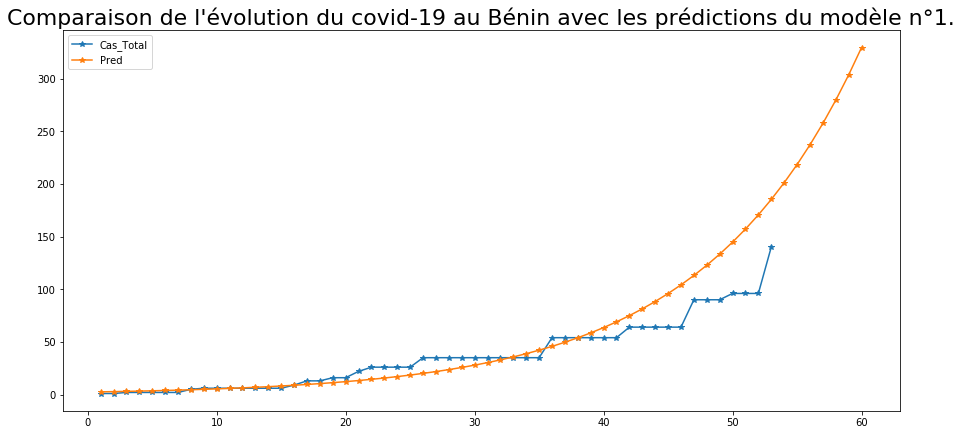

In [19]:
benin.head(60)[['{}'.format(i) for i in ['Cas_Total', 'Pred']]].plot(marker='*',figsize=(15,7)).set_title("Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°1.",fontdict={'fontsize': 22})

Comme on peut le voir sur la figure ci-dessus, notre prédiction s'éloigne un peu trop des valeurs réelles. Cela laisse croire déjà que notre modèle ne nous sera pas trop d'une grande utilité. Au passage, parlant de modèles, il vous faut savoir que tous les modèles sont mauvais, juste quelques uns sont utiles, et ce n'est pas moi qui le dis. 
<blockquote>
    <p>All models are wrong, but some are useful.</p>
    <footer>
        George Edward Pelham Box (Statisticien Anglais).
    </footer>
</blockquote>
Nous allons calculer quelques métriques qui permettent d'évaluer un modèle de de régression linéaire en machine learning. Il s'agit principalement de

- <b> Le coefficient de détermination (R - Carré) </b> : Il représente la proportion de la variance de l'évolution du nombre cumulé de cas de covid-19 que notre modèle a pu expliquer. En d'autres termes, il s'agit du coefficient d'adéquation des valeurs prédites par rapport aux valeurs réelles. Sa valeur varie entre 0 (0 %) et 1 (100 %), et plus elle est proche de 1, meilleur est le modèle.
- <b> RMSE </b> : L'erreur quadratique moyenne (MSE) est la moyenne du carré des différences entre les valeurs réelles et prédites sur l'ensemble de données. La RMSE est égale à la racine carrée du MSE. Plus elle est petite, meilleure est le modèle.
- <b> L'erreur absolue moyenne (MAE) </b> : Elle représente la moyenne de la différence absolue entre les valeurs réelles et prédites sur l'ensemble des données. Plus elle est petite, meilleur est le modèle.

<img src="images/metrique.jpg">

In [20]:
diff = benin.dropna()['Cas_Total'] - benin.dropna()['Pred']
mse_f = (np.mean(diff**2))
mae_f = np.mean(abs(diff))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(diff**2)/sum((benin.dropna()['Cas_Total']-np.mean(benin.dropna()['Cas_Total']))**2))

print("Les métriques de mesure du modèle")
print("MAE:",round(mae_f, 2))
print("RMSE:", round(rmse_f, 2))
print("R-Carré:", round(r2_f, 4))

Les métriques de mesure du modèle
MAE: 12.25
RMSE: 20.63
R-Carré: 0.5891


Notre modèle a pu expliquer 58.91 % de la variance de l'évolution du nombre cumulé de cas de covid-19 détecté au Bénin. Généralement, les modèles avec une valeur supérieure à 50 % sont dits acceptables. Personnellement, le minimim que je me fixe est de 75 %, on va donc essayer d'autres modèles dans l'espoir d'en trouver un qui sera plus utile (vu qu'ils sont de toutes les manières tous mauvais selon Edward Box). Mais d'abord nous verrons une autre manière de faire directement de la régression linéaire simple sans avoir à utiliser en trèspeu de lignes de codes dans Python. On utilisera cette fois-ci la librairie numpy chargée au début sous le pseudo <b>np</b>.

In [21]:
x = np.array(list(benin.dropna().index))
y = np.array(list(benin.dropna().Cas_Total))

In [22]:
dim = np.polyfit(x, np.log(y), 1) # 1 : Régression linéaire simple (degré = 1)

In [23]:
dim

array([0.08225881, 0.77956194])

Si vous comparez la valeur des paramètres ci-dessus avec celles trouvées beaucoup plus haut, vous constaterez qu'elles sont les mêmes. On va donc se passer des prédictions pour ce cas et passer à un autre modèle. La méthode numpy nous permet d'appliquer une pondération à chaque valeur par jour avant la modélisation. Cela permet de réduire le biais de prédiction au niveau des petites valeurs surtout. notre prochain modèle sera donc juste une correction de la première par l'ajout d'un nouveau paramètre qu'est la pondération. 

In [24]:
dim2 = np.polyfit(x, np.log(y), 1, w=np.sqrt(y)) # j'ai choisi pour poids la racine carrée de chaque valeur = np.sqrt(y)
dim2

array([0.06011946, 1.61041116])

In [25]:
print(f"L'équation la droite y2(t) = {round(dim2[0], 4)} t + {round(dim2[1], 4)}. Alors notre modèle exponentielle Y2_e(t) = {round(np.exp(dim2[1]), 4)} * ({round(np.exp(dim2[0]), 4)})^t.")

L'équation la droite y2(t) = 0.0601 t + 1.6104. Alors notre modèle exponentielle Y2_e(t) = 5.0049 * (1.062)^t.


In [26]:
mod2 = np.poly1d(dim2)
benin['Pred2'] = 0
for i in benin.index:
    benin.loc[i, 'Pred2'] = np.exp(mod2(i))

Text(0.5, 1.0, "Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°2.")

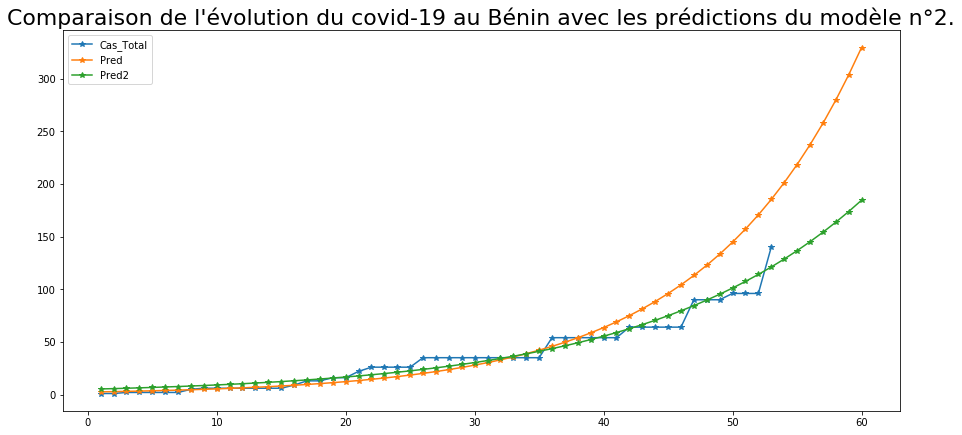

In [27]:
benin.head(60)[['{}'.format(i) for i in ['Cas_Total', 'Pred', 'Pred2']]].plot(marker='*',figsize=(15,7)).set_title("Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°2.",fontdict={'fontsize': 22})

Même si au départ, il y a déjà un écart entre les valeurs prédites et les valeurs réelles, on constate que généralement les prédictions de notre modèle ne s'éloignent pas trop des valeurs réelles. Comparativement au modèle n°1, le modèle n°2 semble meilleur. On calculera les métriques de mesures de modèle afin de détenir plus d'éléments d'analyse et de comparaison des deux modèles.

In [28]:
diff2 = benin.dropna()['Cas_Total'] - benin.dropna()['Pred2']
mse_f2 = np.mean(diff2**2)
mae_f2 = np.mean(abs(diff2))
rmse_f2 = np.sqrt(mse_f2)
r2_f2 = 1-(sum(diff2**2)/sum((benin.dropna()['Cas_Total']-np.mean(benin.dropna()['Cas_Total']))**2))

print("Les métriques de mesure du modèle")
print("MAE:", round(mae_f2,2))
print("RMSE:", round(rmse_f2,2))
print("R-Carré:", round(r2_f2,4))

Les métriques de mesure du modèle
MAE: 5.41
RMSE: 6.73
R-Carré: 0.9562


Le modèle n°2 explique 95,62 % de la variance de l'évolution du nombre cumulé de cas de covid-19 au Bénin. Par rapport donc au R-carré, il est meilleur que le modèle n°1, avec aussi des MAE et RMSE plus petites. C'est encourageant comme résultat. On verra s'il y a moyen de faire mieux sans pour autant rentrer dans des modélisations un peu moins facile à comprendre.
Et si au Bénin la croissance du nombre cumulé de cas de covid-19 n'est pas vraiment exponentielle mais plutôt polynomiale ? Afin de vérifier cette éventualité, nous allons comparer la courbe du logarithme des valeurs cumulées à une courbe de croissance logarithmique au lieu d'une ligne droite cette fois-ci. Pourquoi ? 
<img src="images/fonction.jpg">
Quand on effectue une transformation logarithmique sur une fonction exponentielle, cette dernière est désormais semblable à l'allure d'une droite. Mais quand la fonction à laquelle cette transformation est effectuée est en réalité polynomiale, sa transformation maintient une allure logarithmique comme sur l'image ci-dessus.

In [29]:
benin['Log_n_jour'] = np.log(benin.index)

Text(0.5, 1.0, "Comparaison de l'évolution du logarithme du nombre cumulé de cas de covid-19 \n à une croissance logarithmique.")

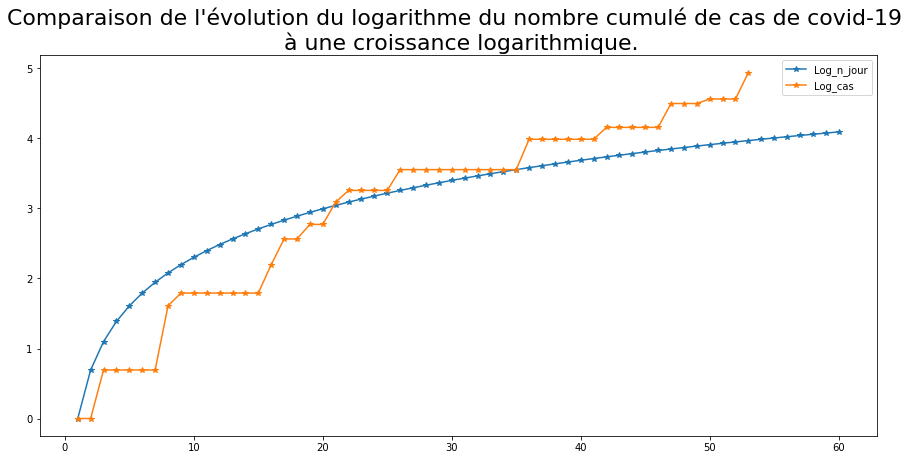

In [30]:
benin.head(60)[['{}'.format(i) for i in ['Log_n_jour', 'Log_cas']]].plot(marker='*',figsize=(15,7)).set_title("Comparaison de l'évolution du logarithme du nombre cumulé de cas de covid-19 \n à une croissance logarithmique.",fontdict={'fontsize': 22})

La ressemblance entre la courbe ln(nombre de jour) et la courbe ln (cas total) est assez proche pour tester aussi l'hypothèse de la croissance polynomiale (degré >= 2). Cette simulation peut être effectuée toujours avec la librairie numpy en précisant le degré de notre polynôme chaque fois.

In [31]:
dim3 = np.polyfit(x, y, 2) # sans pondération ()
dim3

array([ 0.04061489, -0.21489418,  3.36924784])

In [32]:
print(f"L'équation la notre modèle de degré 2 est f(t) = {round(dim3[0], 4)} t² + {round(dim3[1], 4)} t + {round(dim3[2], 4)}.")

L'équation la notre modèle de degré 2 est f(t) = 0.0406 t² + -0.2149 t + 3.3692.


Text(0.5, 1.0, "Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°2-3.")

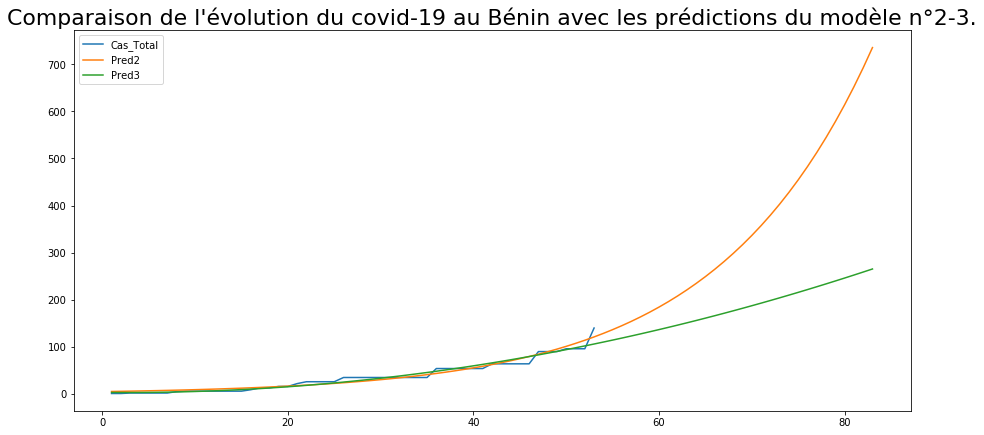

In [33]:
mod3 = np.poly1d(dim3)
benin['Pred3'] = 0
for i in benin.index:
    benin.loc[i, 'Pred3'] = mod3(i)

benin[['{}'.format(i) for i in ['Cas_Total', 'Pred2', 'Pred3']]].plot(marker='',figsize=(15,7)).set_title("Comparaison de l'évolution du covid-19 au Bénin avec les prédictions du modèle n°2-3.",fontdict={'fontsize': 22})

In [34]:
diff3 = benin.dropna()['Cas_Total'] - benin.dropna()['Pred3']
mse_f3 = np.mean(diff3**2)
mae_f3 = np.mean(abs(diff3))
rmse_f3 = np.sqrt(mse_f3)
r2_f3 = 1-(sum(diff3**2)/sum((benin.dropna()['Cas_Total']-np.mean(benin.dropna()['Cas_Total']))**2))

print("Les métriques de mesure du modèle")
print("MAE:",round(mae_f3,2))
print("RMSE:", round(rmse_f3,2))
print("R-Carré:", round(r2_f3,4))

Les métriques de mesure du modèle
MAE: 4.42
RMSE: 6.9
R-Carré: 0.954


Le modèle n°3 semble s'être aussi bien ajusté à l'évolution du nombre cumulé du cas de covid-19 au Bénin. Il est possible de continuer les simulations en augmentant le degré du polynôme et en appliquant ou non de pondération aux observations au fur et à mesure. Nous serons heureux d'en discuter avec vous.

In [35]:
dim4 = np.polyfit(x, y,3)
dim4

array([ 1.03131546e-03, -4.29216609e-02,  1.60640892e+00, -5.20717152e+00])

In [36]:
print(f"Une équation la notre modèle de degré 3 est f(t) = {round(dim4[0], 4)} t³ + {round(dim4[1], 4)} t² + {round(dim4[2], 4)} t + {round(dim4[3], 4)}.")

Une équation la notre modèle de degré 3 est f(t) = 0.001 t³ + -0.0429 t² + 1.6064 t + -5.2072.


Text(0.5, 1.0, "Comparaison de l'évolution du covid-19 au Bénin avec les prédictions des modèle n°3-4.")

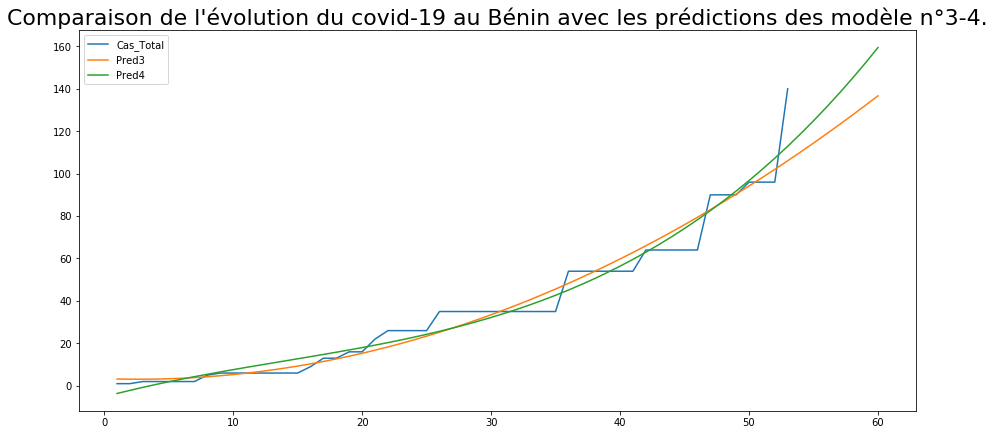

In [37]:
mod4 = np.poly1d(dim4)
benin['Pred4'] = 0
for i in benin.index:
    benin.loc[i, 'Pred4'] = mod4(i)

benin.head(60)[['{}'.format(i) for i in ['Cas_Total', 'Pred3', 'Pred4']]].plot(marker='',figsize=(15,7)).set_title("Comparaison de l'évolution du covid-19 au Bénin avec les prédictions des modèle n°3-4.",fontdict={'fontsize': 22})

In [38]:
diff4 = benin.dropna()['Cas_Total'] - benin.dropna()['Pred4']
mse_f4 = np.mean(diff4**2)
mae_f4 = np.mean(abs(diff4))
rmse_f4 = np.sqrt(mse_f4)
r2_f4 = 1-(sum(diff4**2)/sum((benin.dropna()['Cas_Total']-np.mean(benin.dropna()['Cas_Total']))**2))

print("Les métriques de mesure du modèle")
print("MAE:",round(mae_f4,2))
print("RMSE:", round(rmse_f4,2))
print("R-Carré:", round(r2_f4,4))

Les métriques de mesure du modèle
MAE: 4.51
RMSE: 6.26
R-Carré: 0.9621


In [39]:
bilan = pd.DataFrame(columns=['Formule', 'MAE', 'RMSE', 'R-Carré'])
bilan.loc['Modèle exponentiel - non ajusté', 'Formule'] = f"f(t) = {round(np.exp(res_lin.params['const']), 4)} * ({round(np.exp(res_lin.params['x1']), 4)})^t"
bilan.loc['Modèle exponentiel - non ajusté', 'MAE'] = round(mae_f,2)
bilan.loc['Modèle exponentiel - non ajusté', 'RMSE'] = round(rmse_f,2)
bilan.loc['Modèle exponentiel - non ajusté', 'R-Carré'] = '{} %'.format(100*round(r2_f,4))

bilan.loc['Modèle exponentiel - ajusté', 'Formule'] = f"f(t) = 5{round(np.exp(dim2[1]), 4)} * ({round(np.exp(dim2[0]), 4)})^t"
bilan.loc['Modèle exponentiel - ajusté', 'MAE'] = round(mae_f2,2)
bilan.loc['Modèle exponentiel - ajusté', 'RMSE'] = round(rmse_f2,2)
bilan.loc['Modèle exponentiel - ajusté', 'R-Carré'] = '{} %'.format(100*round(r2_f2,4))

bilan.loc['Modèle polynomial degré - 2', 'Formule'] = f"f(t) = {round(dim3[0], 4)} t² + {round(dim3[1], 4)} t + {round(dim3[2], 4)}"
bilan.loc['Modèle polynomial degré - 2', 'MAE'] = round(mae_f3,2)
bilan.loc['Modèle polynomial degré - 2', 'RMSE'] = round(rmse_f3,2)
bilan.loc['Modèle polynomial degré - 2', 'R-Carré'] = '{} %'.format(round(100*r2_f3,2))

bilan.loc['Modèle polynomial degré - 3', 'Formule'] = f"f(t) = {round(dim4[0], 4)} t³ + {round(dim4[1], 4)} t² + {round(dim4[2], 4)} t + {round(dim4[3], 4)}"
bilan.loc['Modèle polynomial degré - 3', 'MAE'] = round(mae_f4,2)
bilan.loc['Modèle polynomial degré - 3', 'RMSE'] = round(rmse_f4,2)
bilan.loc['Modèle polynomial degré - 3', 'R-Carré'] = '{} %'.format(100*round(r2_f4,4))

In [40]:
bilan

,Formule,MAE,RMSE,R-Carré
Modèle exponentiel - non ajusté,f(t) = 2.1805 * (1.0857)^t,12.25,20.63,58.91 %
Modèle exponentiel - ajusté,f(t) = 55.0049 * (1.062)^t,5.41,6.73,95.62 %
Modèle polynomial degré - 2,f(t) = 0.0406 t² + -0.2149 t + 3.3692,4.42,6.9,95.4 %
Modèle polynomial degré - 3,f(t) = 0.001 t³ + -0.0429 t² + 1.6064 t + -5.2072,4.51,6.26,96.21 %


Text(0.5, 1.0, "Comparaison de l'évolution du covid-19 au Bénin avec les simulations des modèles.")

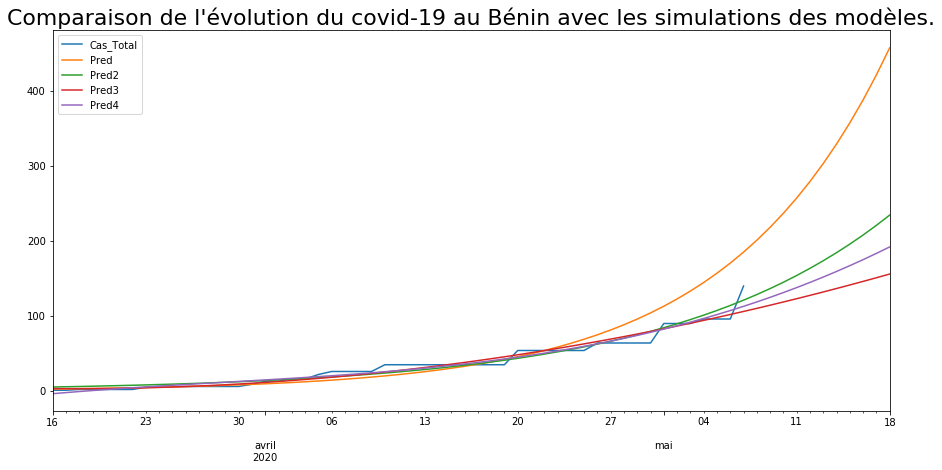

In [41]:
benin.set_index(pd.date_range(start=benin_ts.index[0], periods=len(benin))).loc[pd.date_range(benin_ts.index[0], '2020-05-18')][['{}'.format(i) for i in ['Cas_Total', 'Pred', 'Pred2', 'Pred3', 'Pred4']]].plot(marker='',figsize=(15,7)).set_title("Comparaison de l'évolution du covid-19 au Bénin avec les simulations des modèles.",fontdict={'fontsize': 22})

In [42]:
round(benin.set_index(pd.date_range(start=benin_ts.index[0], periods=len(benin))).loc[pd.date_range('2020-05-08', '2020-05-18')].fillna('')[['Pred','Pred2','Pred3','Pred4']])

,Pred,Pred2,Pred3,Pred4
2020-05-08,201.0,129.0,110.0,119.0
2020-05-09,218.0,137.0,114.0,125.0
2020-05-10,237.0,145.0,119.0,131.0
2020-05-11,257.0,154.0,123.0,138.0
2020-05-12,279.0,164.0,128.0,145.0
2020-05-13,303.0,174.0,132.0,152.0
2020-05-14,329.0,184.0,137.0,159.0
2020-05-15,358.0,196.0,141.0,167.0
2020-05-16,388.0,208.0,146.0,175.0
2020-05-17,422.0,221.0,151.0,184.0
